In [1]:
##########################################
#Step 0: Import libraries
##########################################
import os
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
##########################################
#Step 1: Import data
##########################################

In [3]:
#Setting directory

os.chdir(r'C:\Users\jlenehan\OneDrive - Intel Corporation\Documents\0 - Data Science\Data Analytics Essentials\UCDPA_JohnLenehan\UCDPA_JohnLenehan')

In [4]:
#Importing police report data from last 5 years
#listing json URls and specifying chunksize
url_current = r'https://data.sfgov.org/resource/wg3w-h783.json?$limit=99999999' #current incident reports 2018-present

#using chunksize method to read in large datasets
sfpd_incident_current = pd.read_json(url_current) #reading current incident json

In [5]:
print(sfpd_incident_current.head())

         incident_datetime            incident_date       incident_time  \
0  2023-03-13T23:41:00.000  2023-03-13T00:00:00.000 2023-05-11 23:41:00   
1  2023-03-01T05:02:00.000  2023-03-01T00:00:00.000 2023-05-11 05:02:00   
2  2023-03-13T13:16:00.000  2023-03-13T00:00:00.000 2023-05-11 13:16:00   
3  2023-03-13T10:59:00.000  2023-03-13T00:00:00.000 2023-05-11 10:59:00   
4  2023-03-14T18:44:00.000  2023-03-14T00:00:00.000 2023-05-11 18:44:00   

   incident_year incident_day_of_week          report_datetime        row_id  \
0           2023               Monday  2023-03-13T23:41:00.000  125373607041   
1           2023            Wednesday  2023-03-11T15:40:00.000  125379506374   
2           2023               Monday  2023-03-13T13:17:00.000  125357107041   
3           2023               Monday  2023-03-13T11:00:00.000  125355107041   
4           2023              Tuesday  2023-03-14T18:45:00.000  125402407041   

   incident_id  incident_number report_type_code  ... latitude  long

In [6]:
##########################################
#Step 2: Describe data
##########################################

In [7]:
#Describe recent incidents dataset
print(sfpd_incident_current.columns)
print(sfpd_incident_current.info())
print(sfpd_incident_current.describe())
print(sfpd_incident_current.shape)


Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'report_type_code', 'report_type_description',
       'incident_code', 'incident_category', 'incident_subcategory',
       'incident_description', 'resolution', 'police_district', 'filed_online',
       'cad_number', 'intersection', 'cnn', 'analysis_neighborhood',
       'supervisor_district', 'supervisor_district_2012', 'latitude',
       'longitude', 'point', ':@computed_region_26cr_cadq',
       ':@computed_region_qgnn_b9vv', ':@computed_region_jwn9_ihcz',
       ':@computed_region_h4ep_8xdi', ':@computed_region_nqbw_i6c3',
       ':@computed_region_n4xg_c4py', ':@computed_region_jg9y_a9du'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727658 entries, 0 to 727657
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------       

In [8]:
print('\nSFPD Historical Incidents - Unique Values:')
for x in sfpd_incident_current.columns:
    print(x+':')
    print(sfpd_incident_current[x].unique())
    print(str(sfpd_incident_current[x].nunique()) + str(' unique values'))


SFPD Historical Incidents - Unique Values:
incident_datetime:
['2023-03-13T23:41:00.000' '2023-03-01T05:02:00.000'
 '2023-03-13T13:16:00.000' ... '2023-03-22T17:35:00.000'
 '2023-03-06T16:41:00.000' '2023-03-22T15:28:00.000']
342583 unique values
incident_date:
['2023-03-13T00:00:00.000' '2023-03-01T00:00:00.000'
 '2023-03-14T00:00:00.000' ... '2020-09-13T00:00:00.000'
 '2020-04-02T00:00:00.000' '2020-03-22T00:00:00.000']
1955 unique values
incident_time:
['2023-05-11T23:41:00.000000000' '2023-05-11T05:02:00.000000000'
 '2023-05-11T13:16:00.000000000' ... '2023-05-11T03:52:00.000000000'
 '2023-05-11T05:56:00.000000000' '2023-05-11T08:13:00.000000000']
1440 unique values
incident_year:
[2023 2022 2018 2019 2021 2020]
6 unique values
incident_day_of_week:
['Monday' 'Wednesday' 'Tuesday' 'Saturday' 'Thursday' 'Friday' 'Sunday']
7 unique values
report_datetime:
['2023-03-13T23:41:00.000' '2023-03-11T15:40:00.000'
 '2023-03-13T13:17:00.000' ... '2023-03-21T21:12:00.000'
 '2023-03-22T17:51:

72 unique values
incident_description:
['Vehicle, Recovered, Auto' 'Theft, Other Property, >$950'
 'Theft, Other Property, $50-$200' 'Theft, From Locked Vehicle, >$950'
 'Battery' 'Lost Property'
 'Firearm, Armed While Possessing Controlled Substance'
 'Theft, From Unlocked Vehicle, >$950'
 'Malicious Mischief, Vandalism to Property' 'Methamphetamine Offense'
 'Aided Case' 'Assault, Aggravated, W/ Gun'
 'Access Card Information, Theft of' 'Probation Search' 'Found  Property'
 'License Plate, Recovered' 'Search Warrant Service'
 'Warrant Arrest, Local SF Warrant' 'Vehicle, Recovered, Truck'
 'Warrant Arrest, Enroute To Outside Jurisdiction'
 'Warrant Arrest, Enroute To Probation' 'Mental Health Detention'
 'Theft, Bicycle, $200-$950' 'Parole Search'
 'Malicious Mischief, Graffiti, Real or Personal Property'
 'Vehicle, Recovered, Motorcycle' 'Phone Calls, Harassing'
 'Carjacking with a Gun'
 'Access Card, incl. Credit, Phone, ATM, Fraudulent Use of' 'Case Closure'
 'Investigative Detenti

842 unique values
resolution:
['Open or Active' 'Cite or Arrest Adult' 'Exceptional Adult' 'Unfounded']
4 unique values
police_district:
['Out of SF' 'Mission' 'Central' 'Park' 'Bayview' 'Richmond' 'Southern'
 'Northern' 'Taraval' 'Tenderloin' 'Ingleside']
11 unique values
filed_online:
[nan  1.]
1 unique values
cad_number:
[           nan 2.30741133e+08 2.30742480e+08 ... 2.30801871e+08
 2.30812759e+08 2.30812680e+08]
414887 unique values
intersection:
[nan 'STANYAN ST \\ HAYES ST' 'GEARY ST \\ POWELL ST' ...
 'GATUN ALY \\ BELLA VISTA WAY' 'ELLIOT ST \\ LELAND AVE'
 'WASHINGTON BLVD \\ COMPTON RD']
6382 unique values
cnn:
[      nan 26446000. 24903000. ... 32992000. 20383000. 51364000.]
6470 unique values
analysis_neighborhood:
[nan 'Golden Gate Park' 'Financial District/South Beach' 'Potrero Hill'
 'Tenderloin' 'Pacific Heights' 'Bayview Hunters Point' 'Russian Hill'
 'Marina' 'Mission' 'Outer Richmond' 'Chinatown' 'Sunset/Parkside'
 'Haight Ashbury' 'South of Market' 'Portola' 'Nob

TypeError: unhashable type: 'dict'

In [9]:
##########################################
#Step 3: Clean + Manipulate data
##########################################

In [10]:
#replacing erroneous column names

#defining custom function to rename columns 
def replace_col_names(df, col_dict):
    renamed_df = df.rename(columns=col_dict)
    return renamed_df

col_dict = {":@computed_region_jwn9_ihcz":"Neighbourhoods",
            ":@computed_region_jg9y_a9du":"ESNCAG - Boundary File",
            ":@computed_region_h4ep_8xdi":"Central Market/Tenderloin Boundary Polygon - Updated",
            ":@computed_region_n4xg_c4py":"Civic Center Harm Reduction Project Boundary",
            ":@computed_region_nqbw_i6c3":"HSOC Zones as of 2018-06-05",
            ":@computed_region_viu7_rrfi":"Invest In Neighborhoods (IIN) Areas",
            ":@computed_region_26cr_cadq":"Current Supervisor Districts",
            ":@computed_region_qgnn_b9vv":"Current Police Districts"
           }

sfpd_incident_current = replace_col_names(sfpd_incident_current,col_dict)


In [11]:
#Converting Incident datetime, Report Datetime to a datetime object
sfpd_incident_current[['incident_datetime','report_datetime']] = sfpd_incident_current[['incident_datetime','report_datetime']].apply(pd.to_datetime)

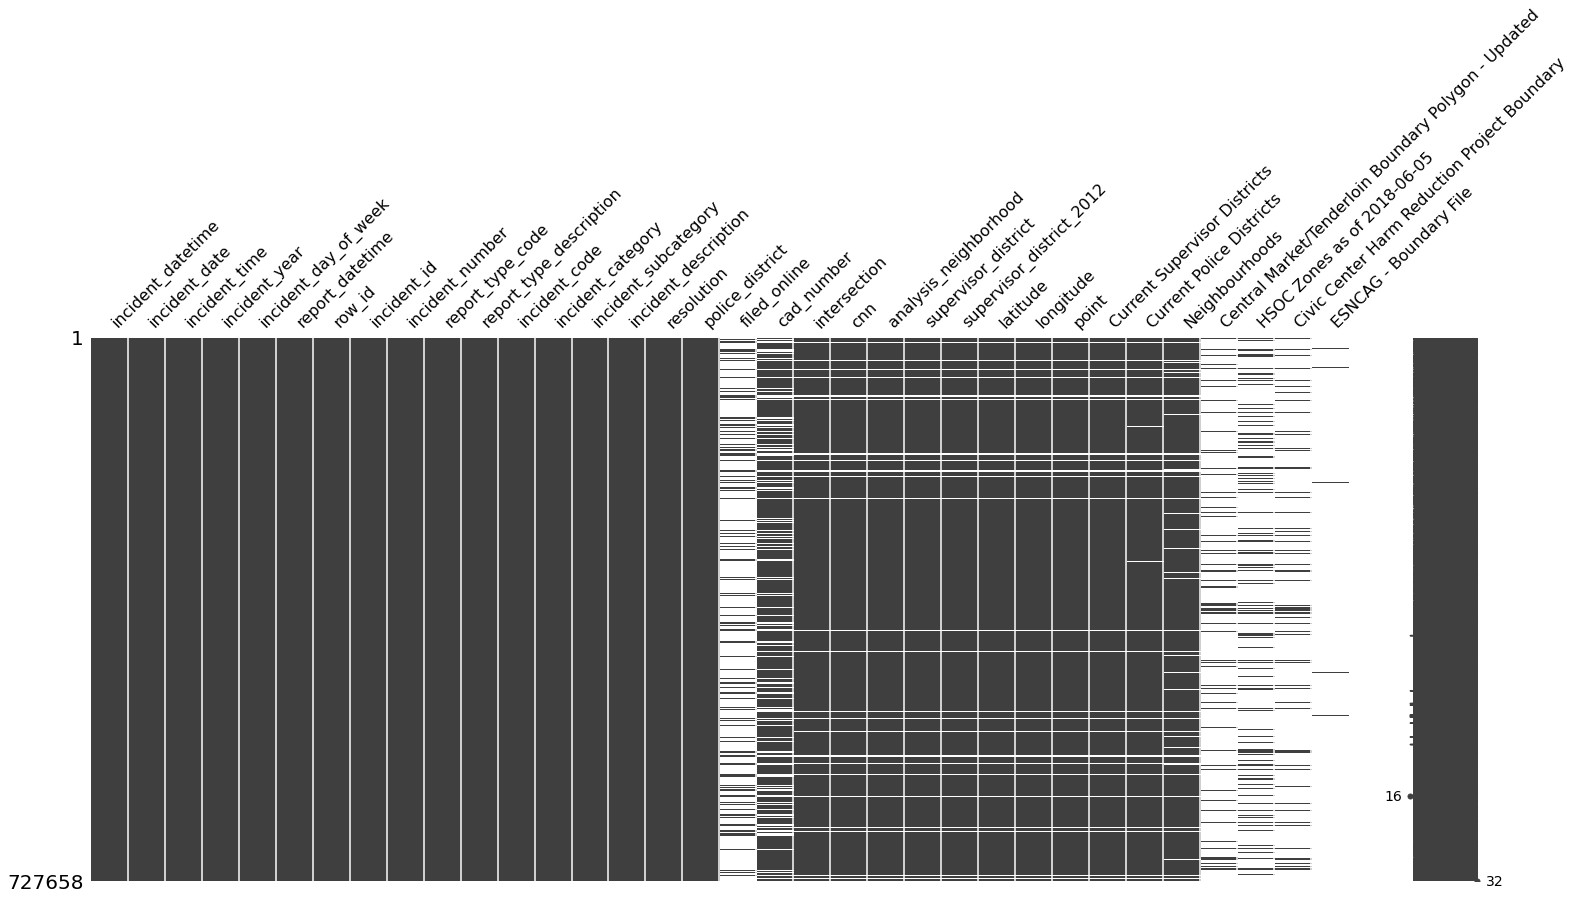

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727658 entries, 362580 to 20697
Data columns (total 34 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     727658 non-null  datetime64[ns]
 1   incident_date                                         727658 non-null  object        
 2   incident_time                                         727658 non-null  datetime64[ns]
 3   incident_year                                         727658 non-null  int64         
 4   incident_day_of_week                                  727658 non-null  object        
 5   report_datetime                                       727658 non-null  datetime64[ns]
 6   row_id                                                727658 non-null  int64         
 7   incident_id                                           727658 

In [12]:
#Visualising missing data

#Sorting values by report received date
sfpd_incident_current = sfpd_incident_current.sort_values(by='incident_datetime',ascending=True)

#plotting matrix of missing data
msno.matrix(sfpd_incident_current)
plt.show()

#info of sorted data
print(sfpd_incident_current.info())

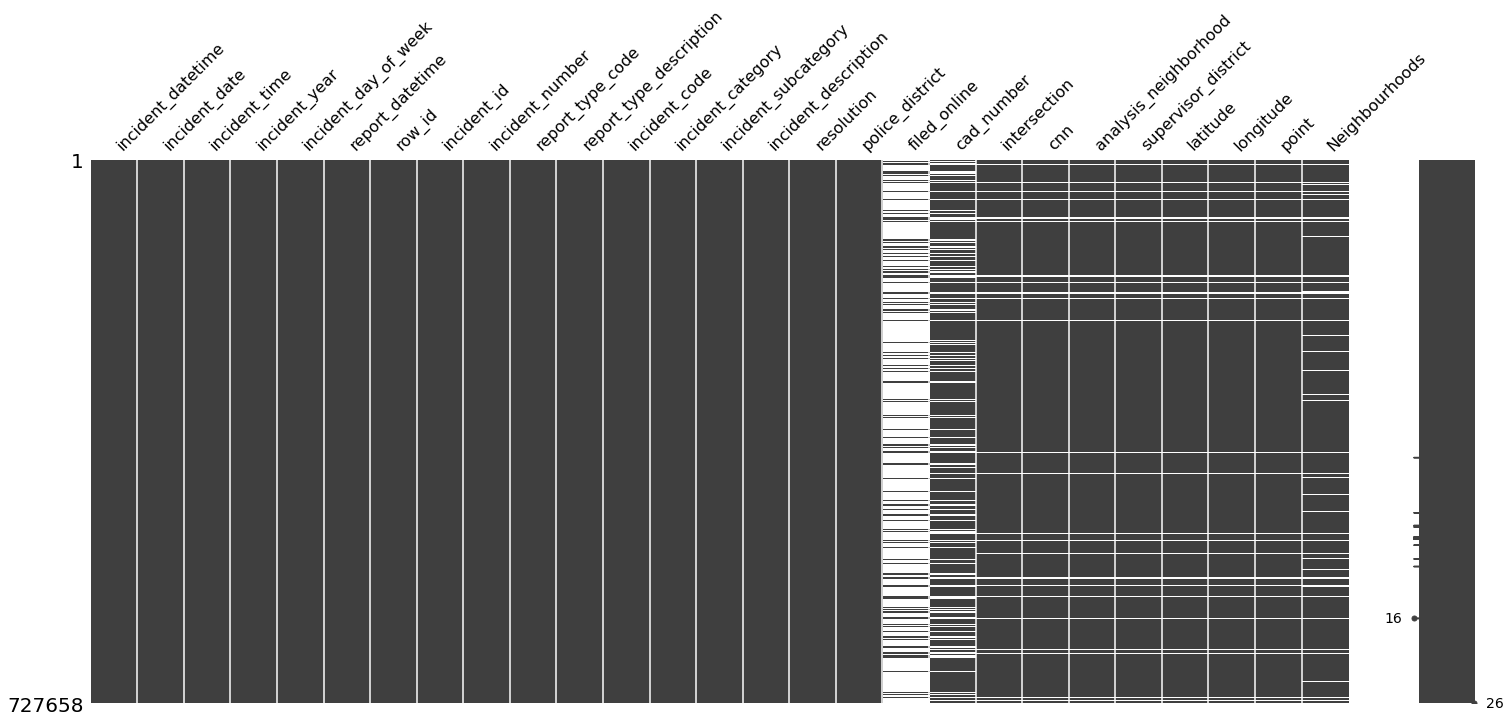

In [14]:
#dropping unnecessary columns
drop_cols = ['supervisor_district_2012','Current Supervisor Districts',
             'Current Police Districts',
             'Central Market/Tenderloin Boundary Polygon - Updated',
             'HSOC Zones as of 2018-06-05',
             'Civic Center Harm Reduction Project Boundary',
             'HSOC Zones as of 2018-06-05',
             'Civic Center Harm Reduction Project Boundary',
             'ESNCAG - Boundary File'
            ]

sfpd_incident_current=sfpd_incident_current.drop(columns=drop_cols)

#plotting matrix of missing data
msno.matrix(sfpd_incident_current)
plt.show()

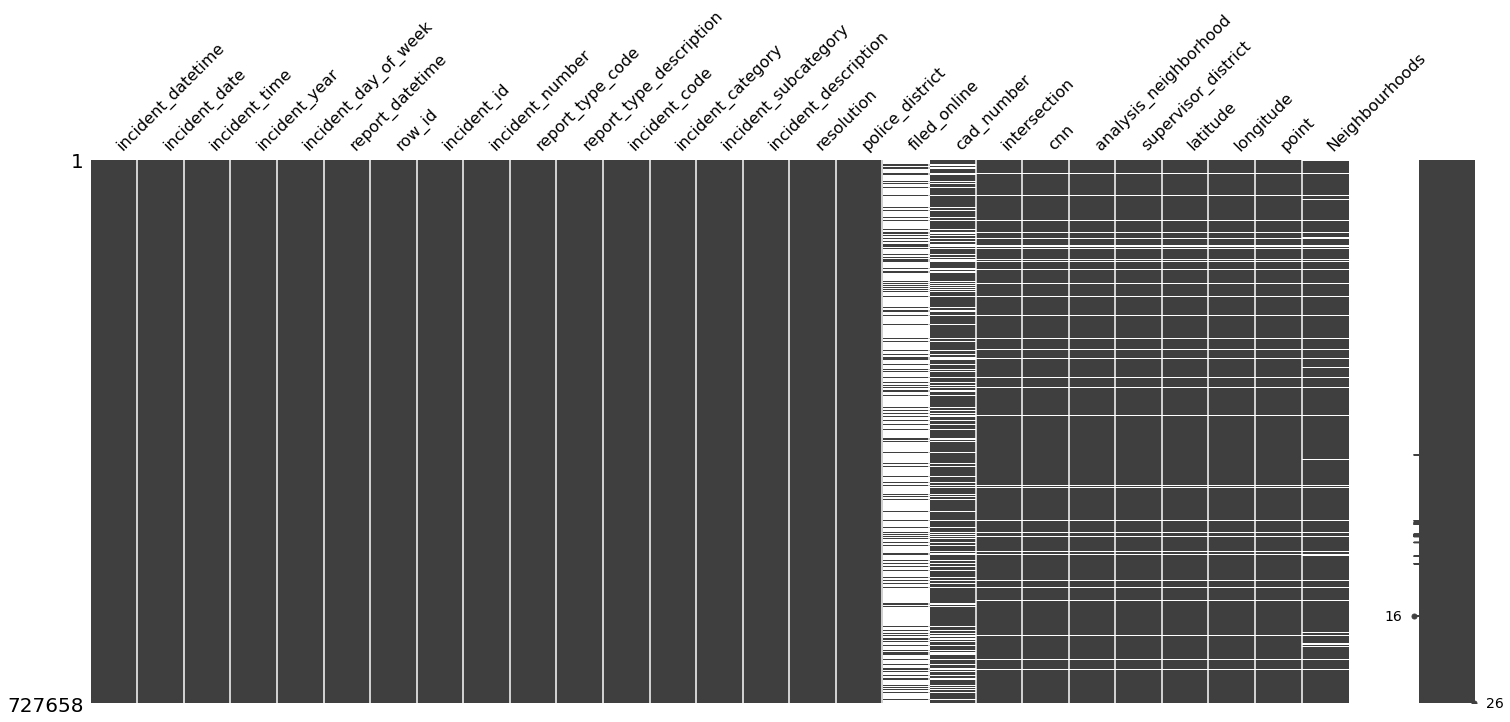

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727658 entries, 559873 to 20697
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   incident_datetime        727658 non-null  datetime64[ns]
 1   incident_date            727658 non-null  object        
 2   incident_time            727658 non-null  datetime64[ns]
 3   incident_year            727658 non-null  int64         
 4   incident_day_of_week     727658 non-null  object        
 5   report_datetime          727658 non-null  datetime64[ns]
 6   row_id                   727658 non-null  int64         
 7   incident_id              727658 non-null  int64         
 8   incident_number          727658 non-null  int64         
 9   report_type_code         727658 non-null  object        
 10  report_type_description  727658 non-null  object        
 11  incident_code            727658 non-null  int64         
 12  incident_cat

In [17]:
#Visualising missing data

#Sorting values by report received date
sfpd_incident_current = sfpd_incident_current.sort_values(by='report_datetime',ascending=True)

#plotting matrix of missing data
msno.matrix(sfpd_incident_current)
plt.show()

#info of sorted data
print(sfpd_incident_current.info())

In [ ]:
##########################################
#Step 4: Joining data
##########################################

In [ ]:
##########################################
#Step 5: Plot data
##########################################

In [ ]:
##########################################
#Step 6: Machine Learning
##########################################